In [18]:
import numpy

from finance_utils.namedtuples import *
from finance_utils.uniontypes import *
from finance_utils.asset.spot.base import Spot
from finance_utils.asset.spot.strategy import SpotCostAveragingPlan
from finance_utils.process.prices.gbm import RVDecoupledGBM, GBM, NormalDistribution
from finance_utils.trader.base import Trader
from finance_utils.trader.utility import *

from matplotlib import pyplot

from data_utils.stochastic_utils.distributions.nonParametricDistribution import HistogramDist, KernelMixDist, SmoothHisDist
from easy_datetime.timestamp import TimeStamp
import tqdm

from matplotlib import pyplot

In [19]:
base_trader = Trader("trader", 20000 * 12, "2000-1-1")

In [20]:
stock = Spot("10001", 100, TradeDelta("day", 1))

In [21]:
stock_process = GBM(stock.name, 1, 0.03/250, 0.015, 250, "2024-1-1", "day", 1)
multi_pathing = stock_process.multi_pathing(base_trader, stock, 100)
print(numpy.mean([multi_pathing.processes[i].timeseries["price"][-1] for i in range(multi_pathing.width)]))

1.0575271044985772


In [22]:
scap = SpotCostAveragingPlan(multi_pathing, stock)

In [23]:
scap_test = scap.simple_cap(20000, 20)
plist = scap_test.spot_slices
ylist = scap_test.yield_slices

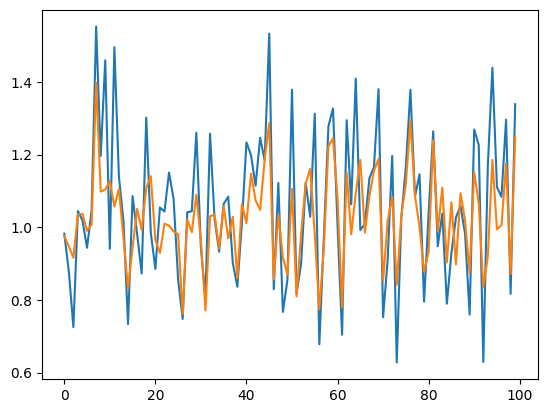

In [24]:
pyplot.plot(plist[-1])
pyplot.plot(ylist[-1])
pyplot.show()

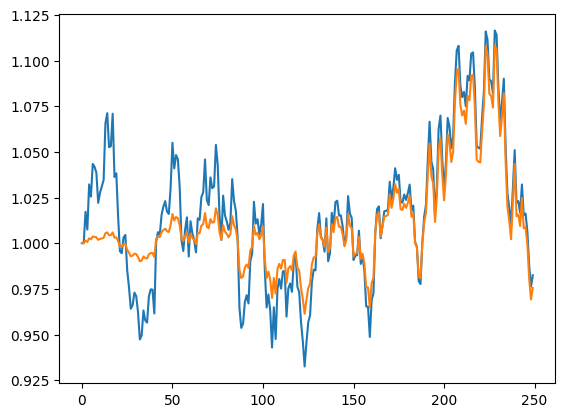

In [25]:
pyplot.plot([i[0] for i in plist])
pyplot.plot([i[0] for i in ylist])
pyplot.show()

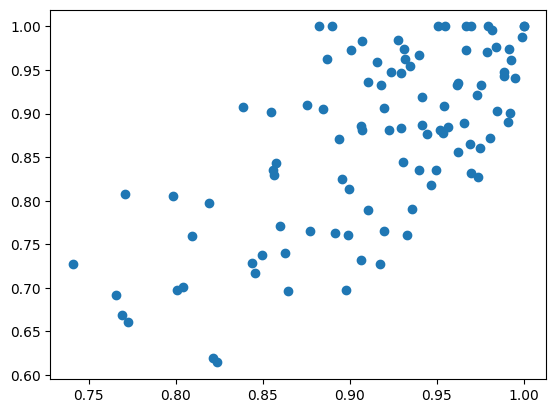

In [26]:
pyplot.scatter(*scap_test.max_drawdown())
pyplot.show()

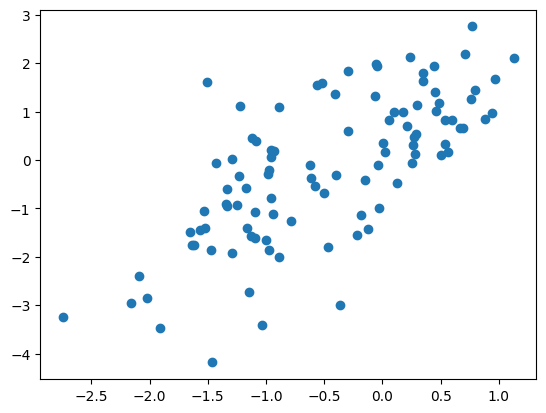

In [27]:
pyplot.scatter(*scap_test.mean_sharp())
pyplot.show()

In [28]:
s1_test = scap.price_qualified_cap(20000, 0.9, 1.1)

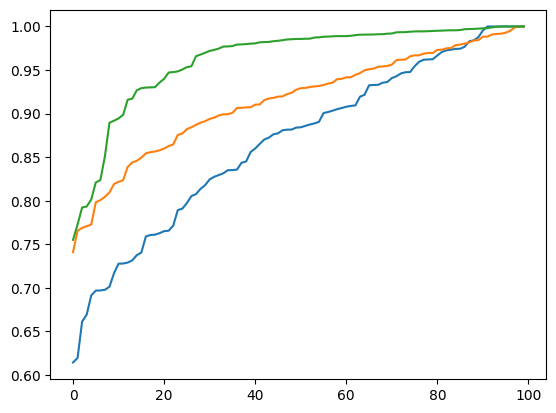

In [29]:
pyplot.plot(sorted(scap_test.max_drawdown().spot))
pyplot.plot(sorted(scap_test.max_drawdown().strategy))
pyplot.plot(sorted(s1_test.max_drawdown().strategy))
pyplot.show()

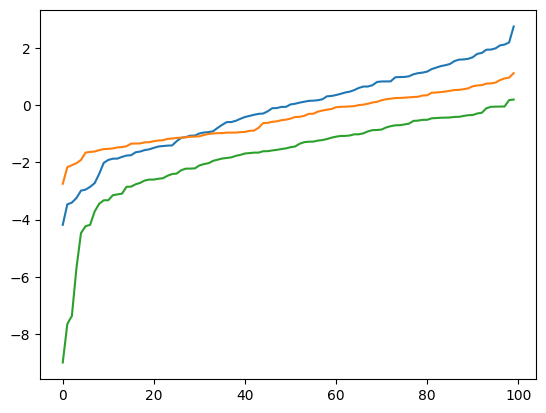

In [30]:
pyplot.plot(sorted(scap_test.mean_sharp().spot))
pyplot.plot(sorted(scap_test.mean_sharp().strategy))
pyplot.plot(sorted(s1_test.mean_sharp().strategy))
pyplot.show()

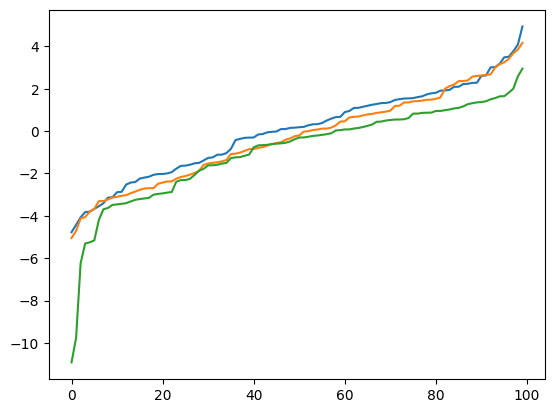

In [31]:
pyplot.plot(sorted(scap_test.slice_sharp().spot))
pyplot.plot(sorted(scap_test.slice_sharp().strategy))
pyplot.plot(sorted(s1_test.slice_sharp().strategy))
pyplot.show()

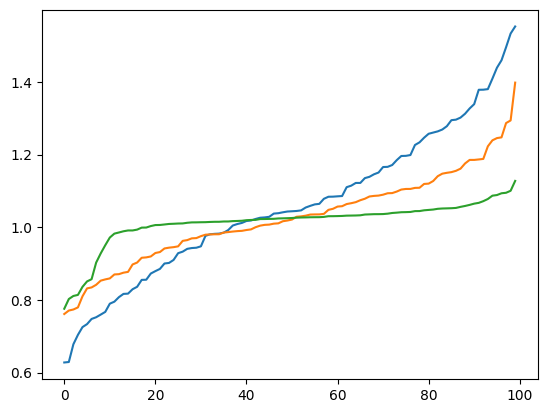

0.2345857736837808
-0.40297860830525245
-0.6188016728138465


In [32]:
pyplot.plot(sorted(scap_test.spot_slices[-1]))
pyplot.plot(sorted(scap_test.yield_slices[-1]))
pyplot.plot(sorted(s1_test.yield_slices[-1]))
pyplot.show()

uf = TimeLossUtilityFunction(1.03)
print(numpy.mean([
    uf(i) for i in scap_test.spot_slices[-1]
]))

print(numpy.mean([
    uf(i) for i in scap_test.yield_slices[-1]
]))

print(numpy.mean([
    uf(i) for i in s1_test.yield_slices[-1]
]))

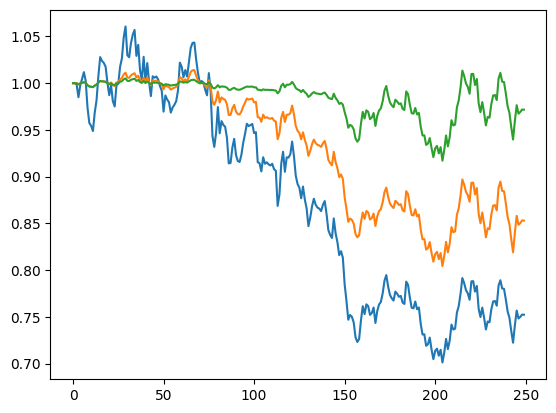

In [33]:
s1_qp = s1_test.quantile_path(0.1)
pyplot.plot(s1_qp.spot)

pyplot.plot([i[s1_qp.i] for i in scap_test.yield_slices])
pyplot.plot(s1_qp.strategy)
pyplot.show()

100%|██████████| 17/17 [00:42<00:00,  2.49s/it]


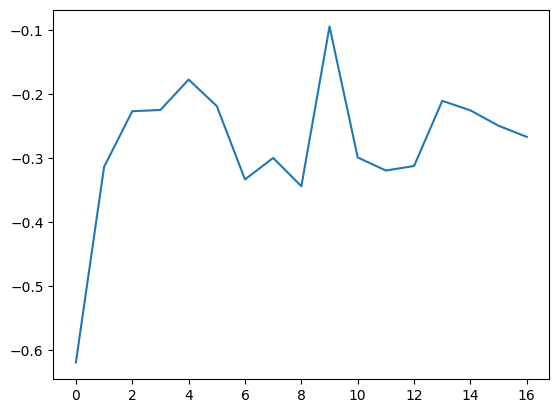

In [34]:
mu = []
for i in tqdm.trange(10, 95, 5):
    loop_test = scap.price_qualified_cap(20000, 1-1/i, 1+1/i)
    mu.append(numpy.mean([
        uf(i) for i in loop_test.yield_slices[-1]
    ]))
pyplot.plot(mu)
pyplot.show()